In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
data = pd.read_csv(r"C:\Users\Makaa\Desktop\Road Accidents\accident data.csv")

In [5]:
df = data.copy()
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


# Data Recognition 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

# Data Cleaning 

In [8]:
df.duplicated().value_counts()

False    660660
True         19
dtype: int64

In [10]:
df.drop_duplicates(keep ='first',inplace = True )

In [11]:
df.duplicated().value_counts()

False    660660
dtype: int64

In [12]:
df.isna().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14127
Vehicle_Type                   0
dtype: int64

In [13]:
import missingno as msno

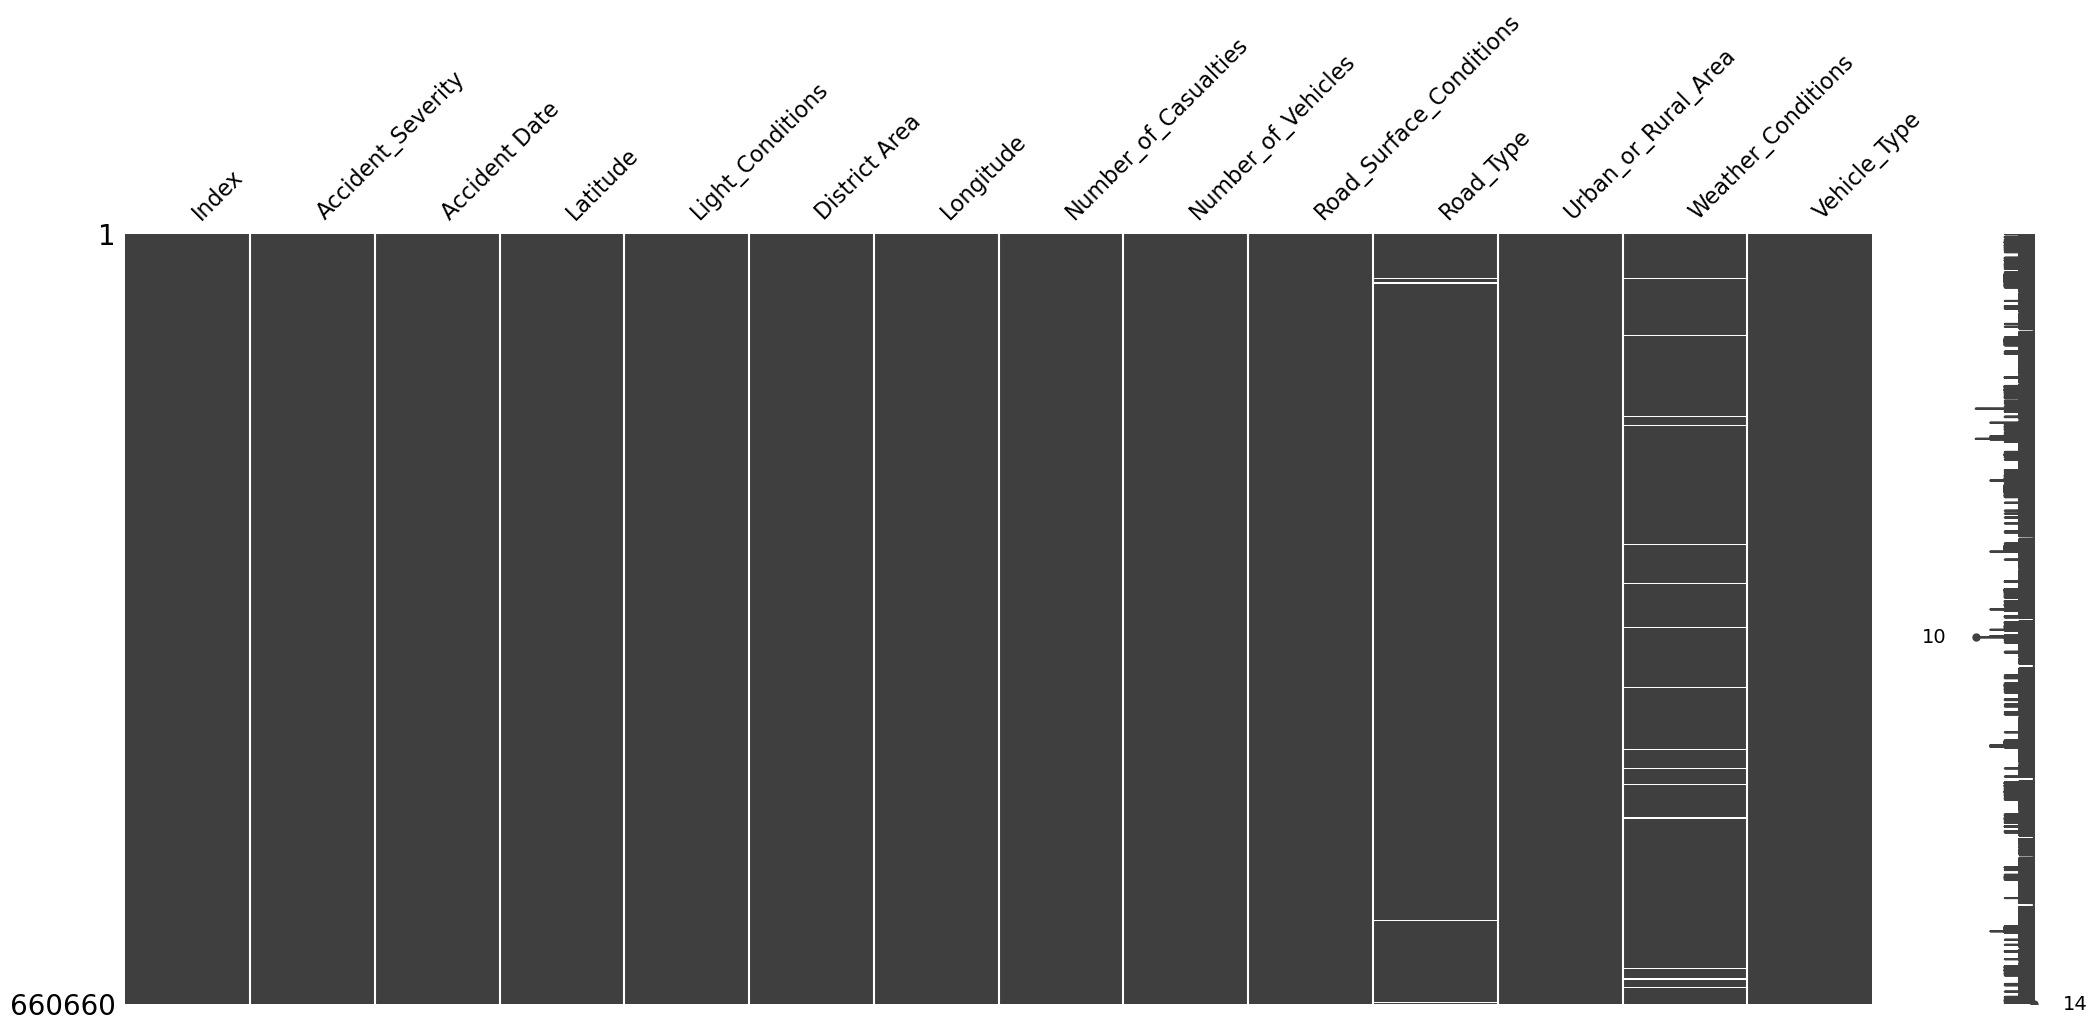

In [14]:
#visualization the missing values 
msno.matrix(df)
plt.show()

# Treat null values 

In [15]:
df.dropna(subset=['Latitude','Longitude'],inplace=True)
df.isna().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4518
Urban_or_Rural_Area            2
Weather_Conditions         14126
Vehicle_Type                   0
dtype: int64

In [16]:
df.dropna(subset=['Urban_or_Rural_Area'],inplace=True)
df.isna().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4517
Urban_or_Rural_Area            0
Weather_Conditions         14126
Vehicle_Type                   0
dtype: int64

In [17]:
df.Road_Surface_Conditions.value_counts()

Dry                     447790
Wet or damp             186700
Frost or ice             18513
Snow                      5887
Flood over 3cm. deep      1016
Name: Road_Surface_Conditions, dtype: int64

In [18]:
df.Road_Surface_Conditions.unique()

array(['Dry', 'Wet or damp', 'Snow', 'Frost or ice',
       'Flood over 3cm. deep', nan], dtype=object)

In [20]:
df.dropna(subset=['Road_Surface_Conditions'],inplace=True)
df.isna().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                   4509
Urban_or_Rural_Area            0
Weather_Conditions         13514
Vehicle_Type                   0
dtype: int64

In [22]:
df.Weather_Conditions.value_counts()

Fine no high winds       520752
Raining no high winds     79687
Other                     17142
Raining + high winds       9615
Fine + high winds          8550
Snowing no high winds      6237
Fog or mist                3526
Snowing + high winds        883
Name: Weather_Conditions, dtype: int64

In [23]:
df.Weather_Conditions = df.Weather_Conditions.fillna('Unknown')
df.isna().sum()

Index                         0
Accident_Severity             0
Accident Date                 0
Latitude                      0
Light_Conditions              0
District Area                 0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Road_Surface_Conditions       0
Road_Type                  4509
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [24]:
df.Weather_Conditions.value_counts()

Fine no high winds       520752
Raining no high winds     79687
Other                     17142
Unknown                   13514
Raining + high winds       9615
Fine + high winds          8550
Snowing no high winds      6237
Fog or mist                3526
Snowing + high winds        883
Name: Weather_Conditions, dtype: int64

In [27]:
df.Road_Type.value_counts()

Single carriageway    491591
Dual carriageway       99343
Roundabout             43902
One way street         13526
Slip road               7035
Name: Road_Type, dtype: int64

In [28]:
df.Road_Type = df.Road_Type.fillna('Unknown')
df.isna().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

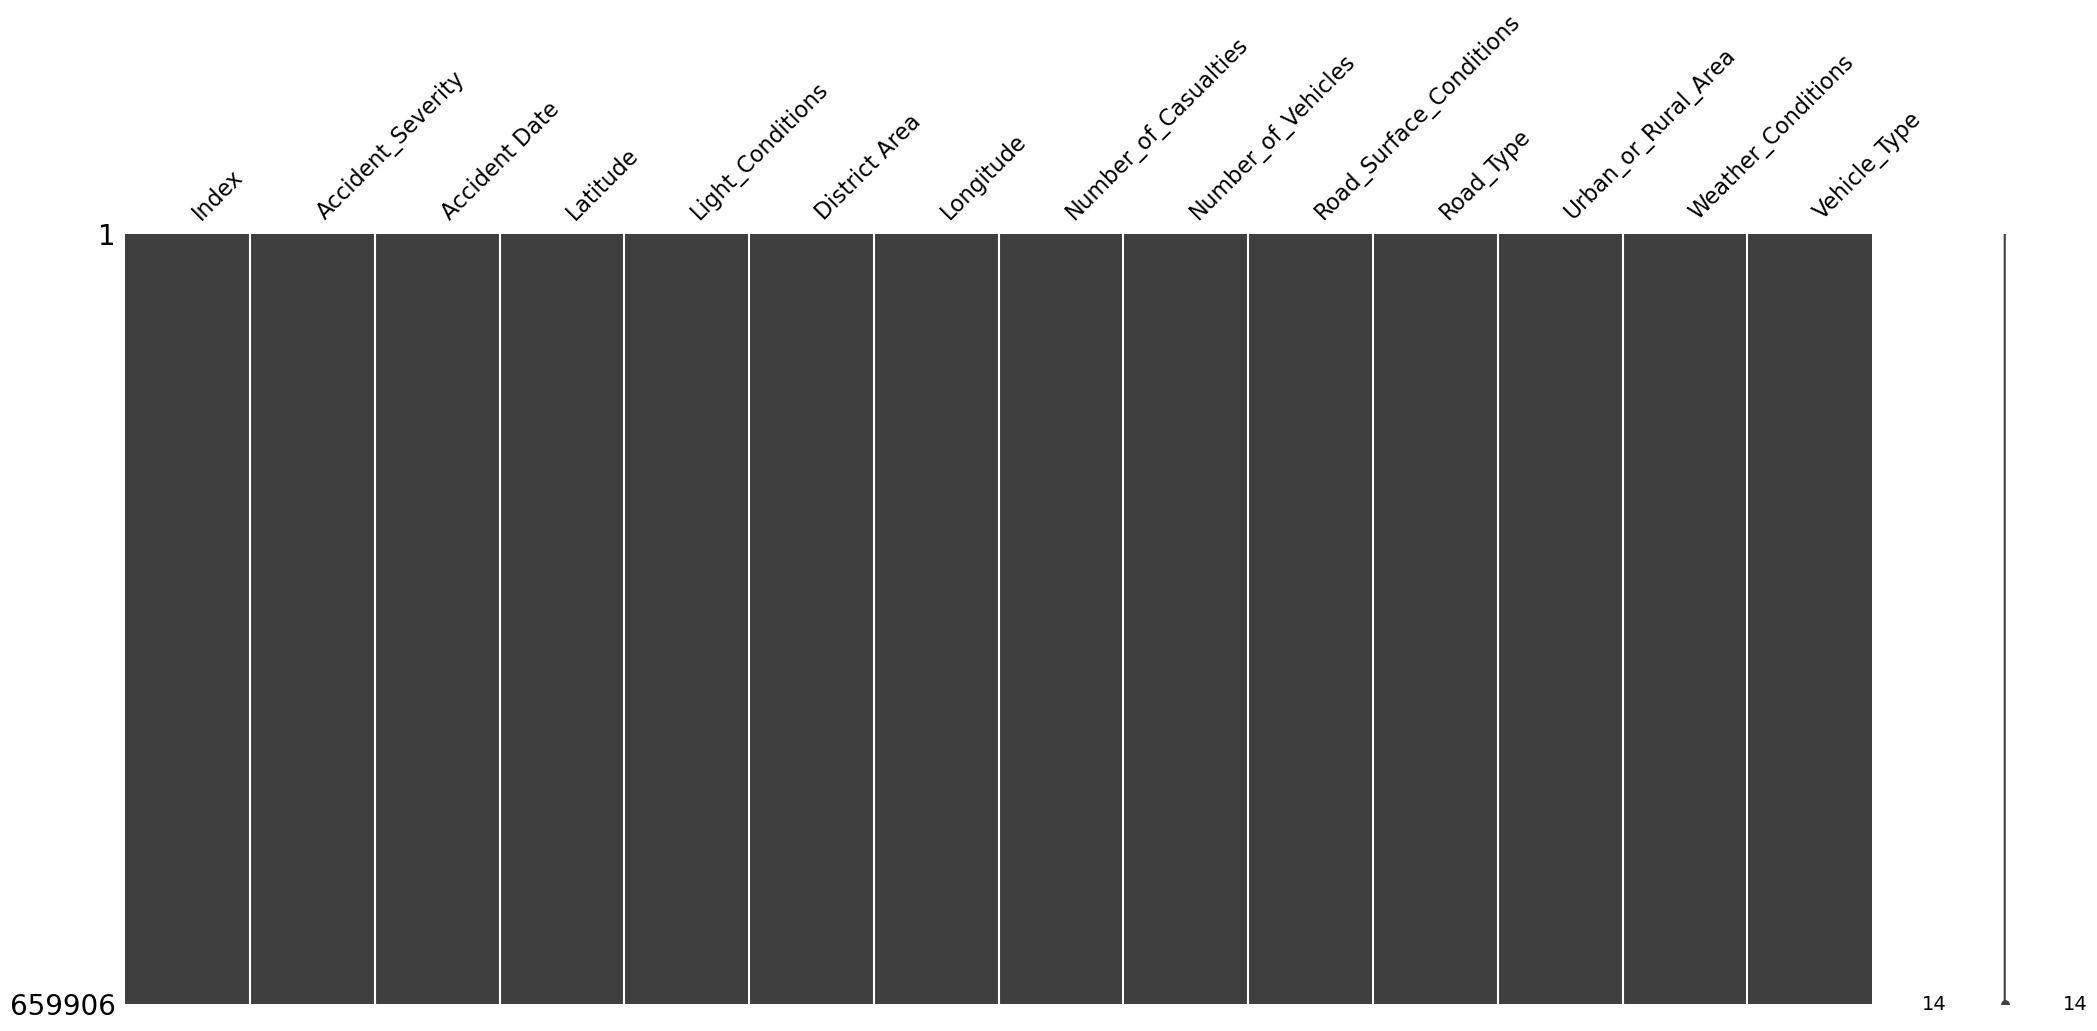

In [29]:
#visualization the missing values 
msno.matrix(df)
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659906 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    659906 non-null  object 
 1   Accident_Severity        659906 non-null  object 
 2   Accident Date            659906 non-null  object 
 3   Latitude                 659906 non-null  float64
 4   Light_Conditions         659906 non-null  object 
 5   District Area            659906 non-null  object 
 6   Longitude                659906 non-null  float64
 7   Number_of_Casualties     659906 non-null  int64  
 8   Number_of_Vehicles       659906 non-null  int64  
 9   Road_Surface_Conditions  659906 non-null  object 
 10  Road_Type                659906 non-null  object 
 11  Urban_or_Rural_Area      659906 non-null  object 
 12  Weather_Conditions       659906 non-null  object 
 13  Vehicle_Type             659906 non-null  object 
dtypes: f

In [31]:
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Unknown,Urban,Unknown,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Unknown,Urban,Unknown,Other vehicle


In [33]:
# We need to change the type of Accident Date to Date 
df['Accident Date'].head(10)

0    05-06-2019
1    02-07-2019
2    26-08-2019
3    16-08-2019
4    03-09-2019
5    18-09-2019
6    05-09-2019
7    03-10-2019
8    31-10-2019
9    18-10-2019
Name: Accident Date, dtype: object

In [35]:
df['Accident Date']= pd.to_datetime(df['Accident Date'],format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659906 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    659906 non-null  object        
 1   Accident_Severity        659906 non-null  object        
 2   Accident Date            659906 non-null  datetime64[ns]
 3   Latitude                 659906 non-null  float64       
 4   Light_Conditions         659906 non-null  object        
 5   District Area            659906 non-null  object        
 6   Longitude                659906 non-null  float64       
 7   Number_of_Casualties     659906 non-null  int64         
 8   Number_of_Vehicles       659906 non-null  int64         
 9   Road_Surface_Conditions  659906 non-null  object        
 10  Road_Type                659906 non-null  object        
 11  Urban_or_Rural_Area      659906 non-null  object        
 12  Weather_Conditio

In [40]:
df.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [43]:
cat_columns = [ 'Accident_Severity', 
       'Light_Conditions',  'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type']

for col in cat_columns:
    print('number of uniques values in ',col ,'are : ',df[col].nunique())
    print('The uniques Values are : ')
    print(df[col].unique())
    print()

number of uniques values in  Accident_Severity are :  3
The uniques Values are : 
['Serious' 'Slight' 'Fatal']

number of uniques values in  Light_Conditions are :  5
The uniques Values are : 
['Darkness - lights lit' 'Daylight' 'Darkness - lighting unknown'
 'Darkness - lights unlit' 'Darkness - no lighting']

number of uniques values in  Road_Surface_Conditions are :  5
The uniques Values are : 
['Dry' 'Wet or damp' 'Snow' 'Frost or ice' 'Flood over 3cm. deep']

number of uniques values in  Road_Type are :  6
The uniques Values are : 
['Single carriageway' 'Unknown' 'Dual carriageway' 'One way street'
 'Roundabout' 'Slip road']

number of uniques values in  Urban_or_Rural_Area are :  3
The uniques Values are : 
['Urban' 'Rural' 'Unallocated']

number of uniques values in  Weather_Conditions are :  9
The uniques Values are : 
['Fine no high winds' 'Raining no high winds' 'Unknown' 'Other'
 'Fine + high winds' 'Raining + high winds' 'Snowing no high winds'
 'Fog or mist' 'Snowing + hig

In [44]:
# Now We can Analysis the data in powerBI 